# **Task \#3**: Machine Learning MC886/MO444
##**Unsupervised Learning and Dimension Reduction Techniques**##

In [1]:
print('Daniel Gardin Gratti ' + '214729')
print('Beatriz Cardoso Nascimento' + ' 247403')

Daniel Gardin Gratti 214729
Beatriz Cardoso Nascimento 247403


## Objective:

Explore **Dimension Reduction Techniques** and **Unsupervised Algorithms** alternatives and come up with the best possible model for the problems.

## Dataset

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 70,000 handwritten digits, with each digit being a grayscale image of size 28x28 pixels. The digits range from 0 to 9 and are evenly distributed in the dataset.

Dataset Information:

- You should respect the following traininig/test split: 42,000 training examples, and 28,000 test examples.

- Each training and test example is assigned to what number is in the sample.

- Each row is a separate image. Column 1 is the class label. The remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

- The data is available at: ([Link of the Dataset](https://drive.google.com/drive/folders/13_nDDMrdIq2pCQU8kAnUQWBefpOAB-71?usp=sharing)): ```digit_recognizer_train.csv``` + ```digit_recognizer_test.csv```


More information about the dataset: *Y. Lecun, L. Bottou, Y. Bengio and P. Haffner, "Gradient-based learning applied to document recognition," in Proceedings of the IEEE, vol. 86, no. 11, pp. 2278-2324, Nov. 1998, doi: 10.1109/5.726791.https://ieeexplore.ieee.org/document/726791*

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from PIL import Image
import pandas as pd
import numpy as np
import random
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

def set_random_seed(n):
   os.environ['PYTHONHASHSEED']=str(n)
   tf.random.set_seed(n)
   np.random.seed(n)
   random.seed(n)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
if not os.path.exists('digit_recognizer_train.csv'):
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1U_HeEtr_IznK413FMgzIvjd1WHMU66nX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1U_HeEtr_IznK413FMgzIvjd1WHMU66nX" -O digit_recognizer_train.csv

set_random_seed(42)
## ------ Read Dataset ----- ##
df = pd.read_csv('digit_recognizer_train.csv')
df = df.sample(frac=1)

y = df['label'].to_numpy()
X = df.drop(columns=['label']).to_numpy() / 255

df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
12628,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8279,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


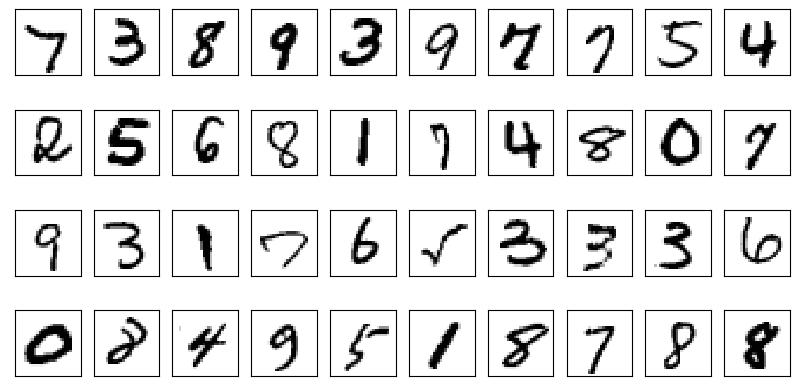

In [4]:
## ------ Plot Data ----- ##

fig, axes = plt.subplots(4, 10, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(df.iloc[i][1:].values.reshape(28,28), cmap='binary', interpolation='nearest')

## 1. Dimensionality Reduction Techniques

Analyze the distribution by plotting th embeddings generated with the aid of dimensionality reduction techniques.

*Obs: Remember to normalize the data* and *test differents hyperparameters* 

(0.5 point) Plot a 2D graph using the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) algorithm.

[]

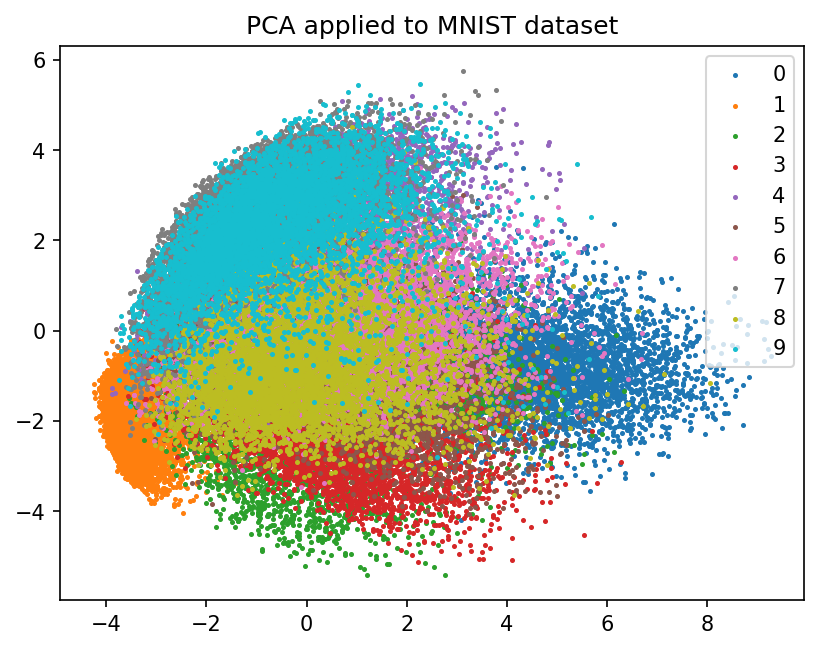

In [5]:
set_random_seed(42)
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*X_pca[y == i].T, label=i, s=2)

ax.legend()
ax.set_title("PCA applied to MNIST dataset")

plt.plot()

(0.5 point) Plot a 2D graph using the [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) algorithm.

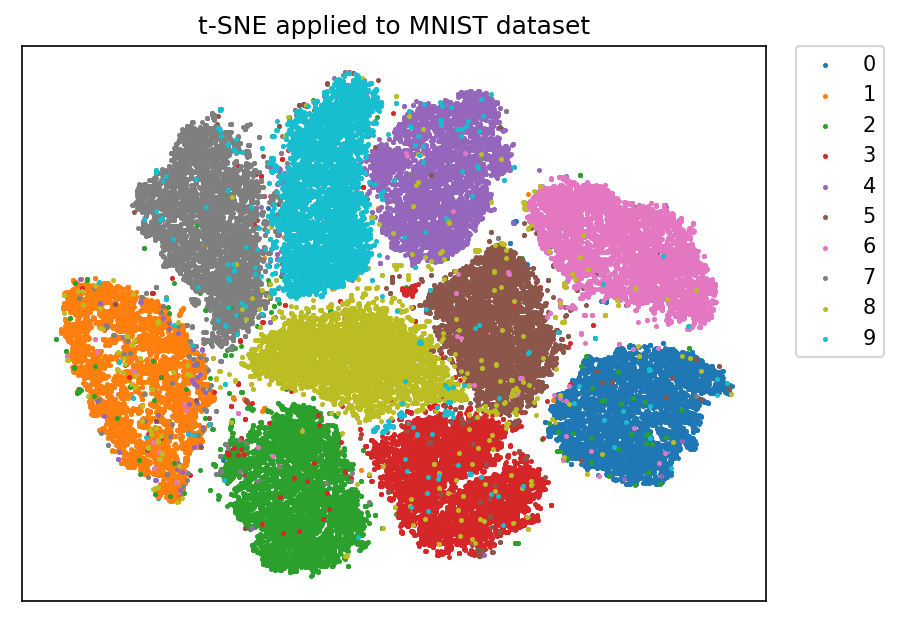

In [6]:
set_random_seed(42)
tsne = TSNE()

X_tsne = tsne.fit_transform(X)

fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*X_tsne[y == i].T, label=i, s=2)

ax.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
ax.set_title("t-SNE applied to MNIST dataset")
ax.set_yticks([])
ax.set_xticks([])

plt.show()

(0.5 point) Plot a 2D graph using a combination of PCA + TSNE

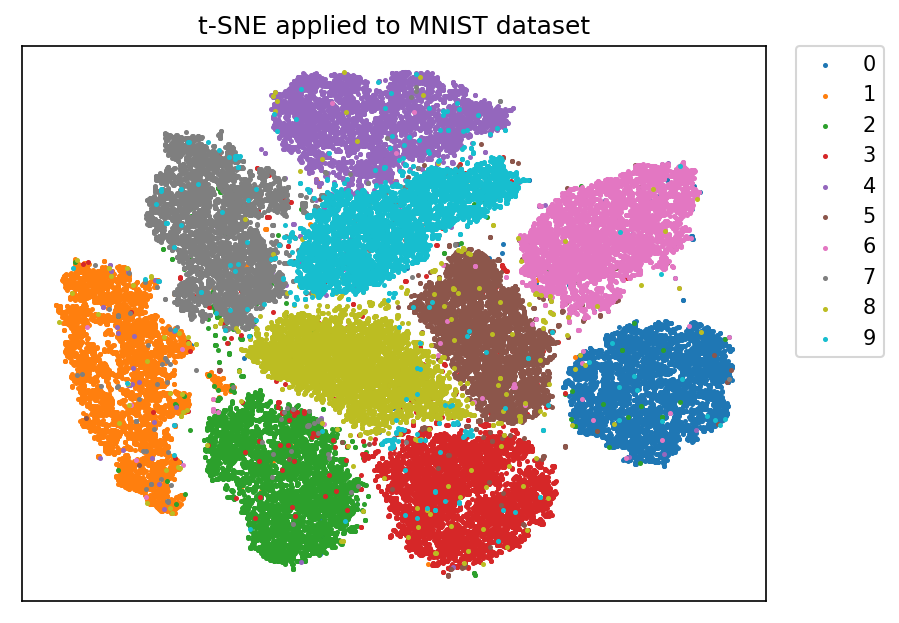

In [7]:
set_random_seed(42)
pca = PCA(n_components=50)
tsne = TSNE(n_jobs=-1)

X_tsne_pca = pca.fit_transform(X)
X_tsne_pca = tsne.fit_transform(X_tsne_pca)

fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*X_tsne_pca[y == i].T, label=i, s=2)

ax.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
ax.set_title("t-SNE applied to MNIST dataset")
ax.set_yticks([])
ax.set_xticks([])

plt.show()

(0.25 point) Plot a 3D graph using the best representation founded.

In [10]:
set_random_seed(42)
pca = PCA(n_components=50)
tsne = TSNE(n_components=3)

X_3d = pca.fit_transform(X)
X_3d = tsne.fit_transform(X_3d)

trace = go.Scatter3d(
    x = X_3d[:, 0],
    y = X_3d[:, 1],
    z = X_3d[:, 2],
    mode = 'markers',
    text = y,
    marker = dict(
    size = 2,
    color = y, # set color to an array/list of desired values
    colorscale = 'rainbow'
    ))

layout = go.Layout(title = '3D Scatter plot', showlegend = True)
fig = go.Figure(data = [trace], layout = layout)
fig.show()

KeyboardInterrupt: 

**(1.75 point) Questions:**
- What is the best representation, and why?
- Do the combination of techniques help improve the results?
- Did adding another dimension help enhance the performance?
- How can we use this knowledge to decide which model to train?

(Optional) Additionally, you can visually explore the data and its distribution by plotting the original image in a 2D space.

In [ ]:
def plot_images(best_embedding, images, width=2000, height=1000, max_dim=10):
  '''
    best_embedding : np.array
      Best representation found

    images : np.array
      Original Images  
  '''
  
  tx, ty = best_embedding[:, 0], best_embedding[:, 1]
  tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
  ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

  full_image = Image.new('RGBA', (width, height))

  for data, x, y in zip(images, tx, ty):
    tile = Image.fromarray(np.uint8(data.reshape(28,28)))
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

  plt.figure(figsize = (16,12))
  plt.imshow(full_image)
  plt.title("t-SNE applied to MNIST dataset")
  plt.yticks([])
  plt.xticks([])
  plt.show()

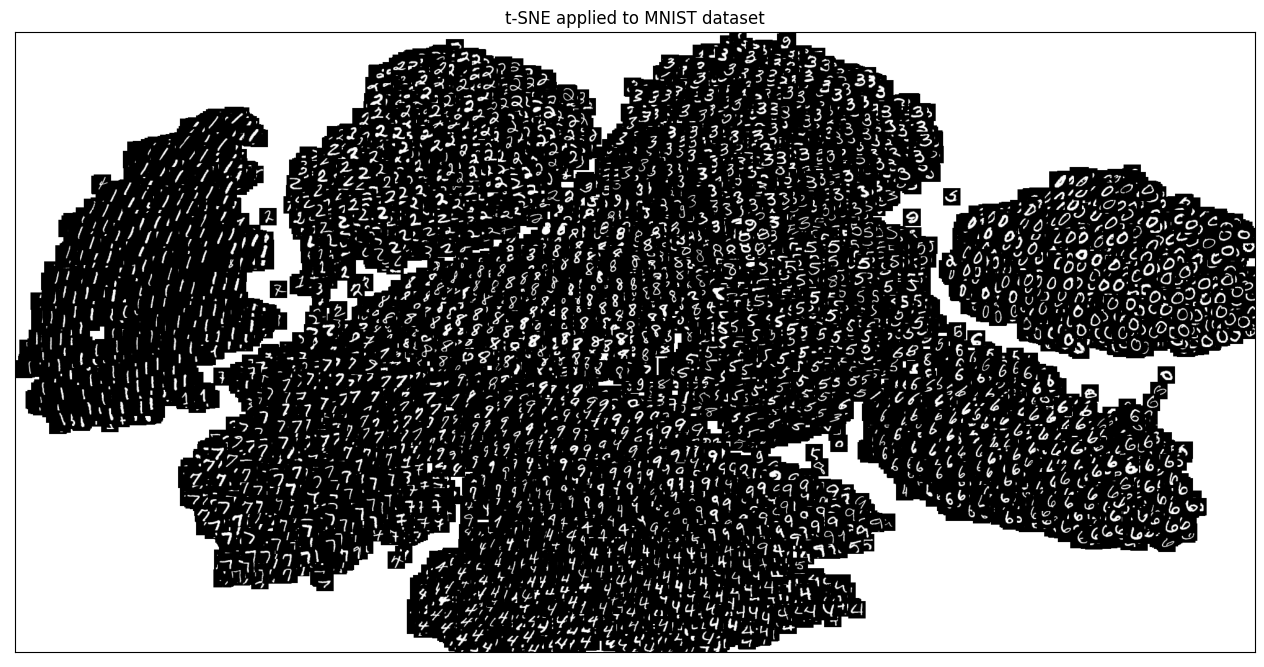

In [ ]:
plot_images(X_tsne_pca, df.to_numpy()[:, 1:])

(Optional) Besides this algorithms, another popular algorithm is Uniform Manifold Approximation and Projection ([UMAP](https://umap-learn.readthedocs.io/en/latest/)). Plot a 2D graph using this technique.

Obs: *here is a great video that explains this method and the differences between it and t-SNE*. 

Link: https://www.youtube.com/watch?v=eN0wFzBA4Sc&ab_channel=StatQuestwithJoshStarmer.

In [ ]:
!pip install umap-learn -q
import umap

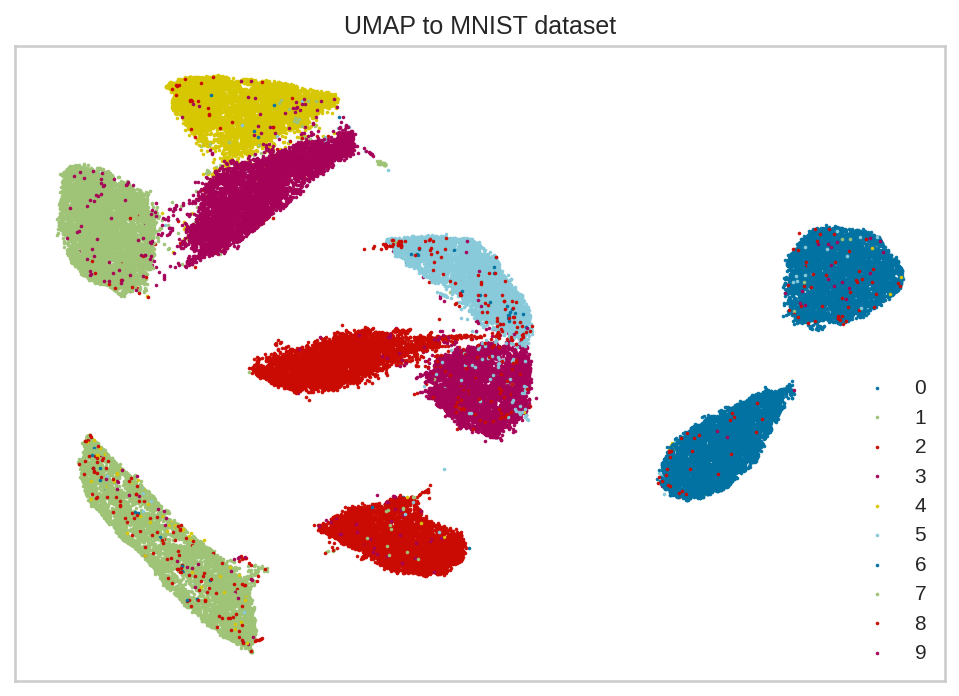

In [ ]:
set_random_seed(42)
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

fig, ax = plt.subplots(dpi=150)

for i in range(10):
    ax.scatter(*X_umap[y == i].T, label=i, s=2)

ax.legend()
ax.set_title("UMAP to MNIST dataset")
ax.set_yticks([])
ax.set_xticks([])
plt.show()

## 2. Unsupervised Learning

The main idea of this section is to train an unsupervised learning algorithm to identify the possible groups present in the MNIST dataset. 

(0.25 point) Train a KMeans algorithm using the best representation found in the previous section and plot the resulting clusters. Compare with the original representation.

*Obs: Use ``` n_cluster = 10 ``` for the KMeans algorithm.*

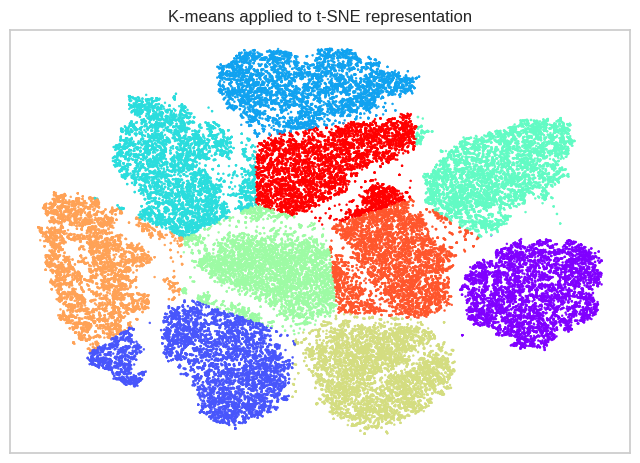

In [ ]:
from sklearn.cluster import KMeans

set_random_seed(42)
kmeans = KMeans(n_clusters=10, n_init=50, max_iter=300)

kmeans.fit(X_tsne_pca)

plt.scatter(X_tsne_pca[:,0], X_tsne_pca[:,1], c=kmeans.labels_, cmap='rainbow', s=2)
plt.title("K-means applied to t-SNE representation")
plt.yticks([])
plt.xticks([])
plt.show()


(0.5 points) Choose the best ```n_cluster``` using the Elbow Method. Plot the graph to assist.

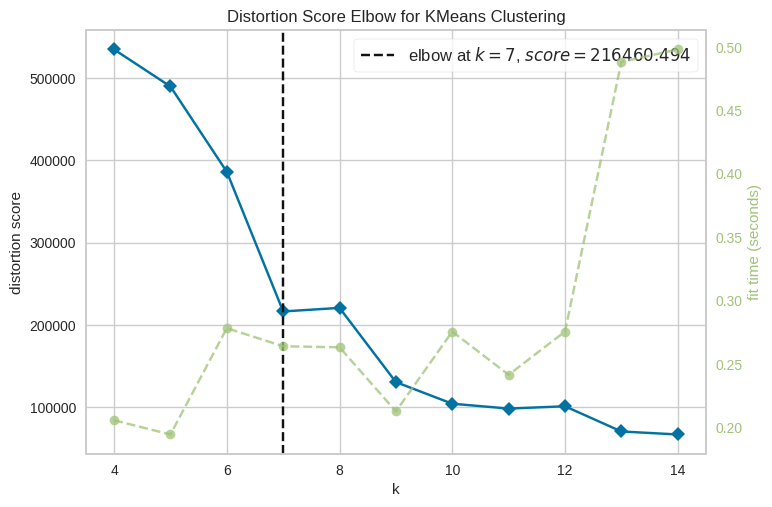

In [ ]:
!pip install yellowbrick -q
from yellowbrick.cluster import KElbowVisualizer

set_random_seed(42)
kmeansTest = KMeans(n_init="auto")

visualizer = KElbowVisualizer(kmeansTest, k=(4,15))

visualizer.fit(X_umap)        # Fit the data to the visualizer
visualizer.show()
plt.show()

## 3. Classification with PCA

PCA can be used in combination with a supervised learning model.

(0.5 points) Choose the best ```n_cluster``` using the Silhouette Analysis. Plot the silhouette and the average score.

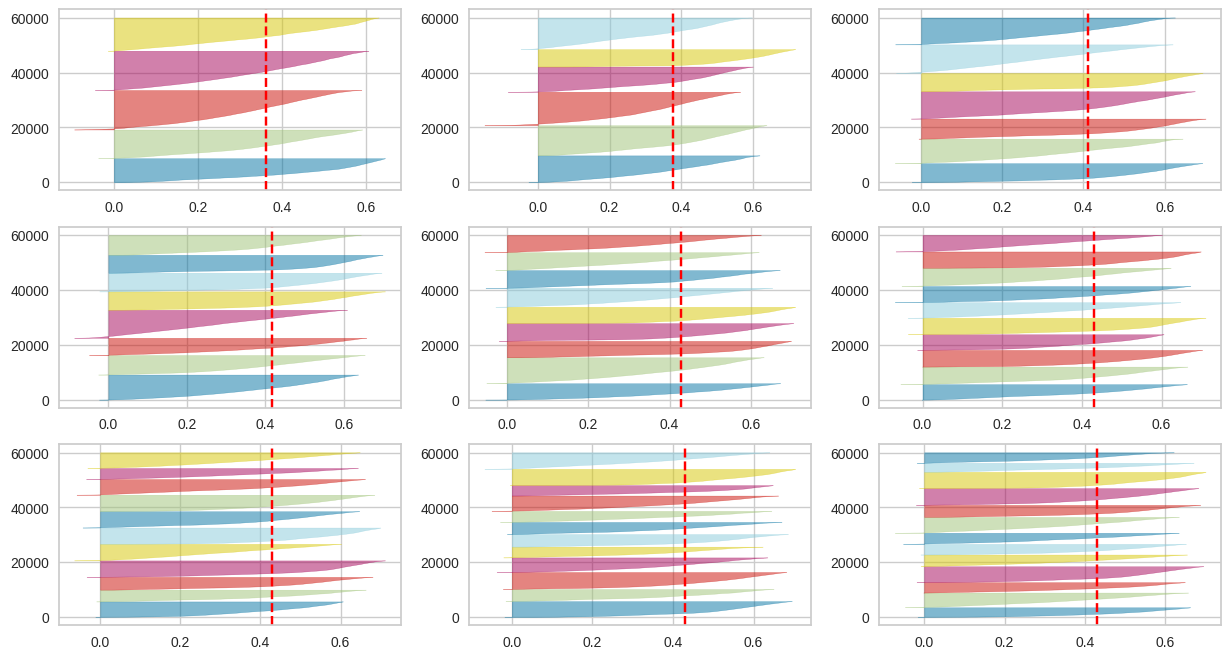

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))

set_random_seed(42)
scores = []
for i in range(9):
    km = KMeans(n_clusters=5 + i, n_init=50, max_iter=300, init='random')
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[i//3, i%3])
    visualizer.fit(X_tsne_pca) 
    scores.append(visualizer.silhouette_score_) 

plt.show()

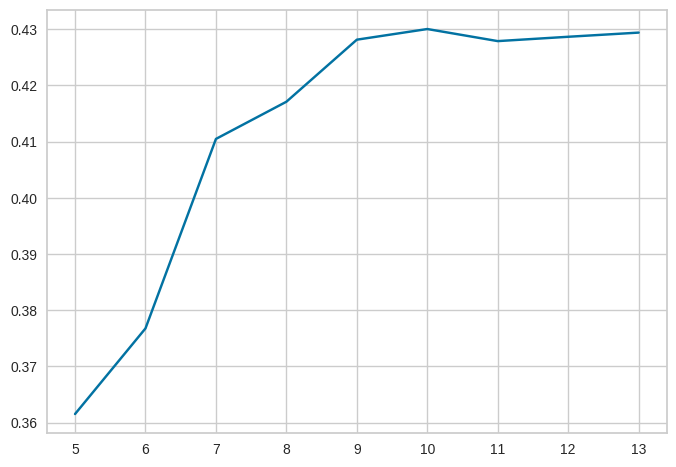

In [ ]:
plt.plot(range(5, 14), scores)

(0.25 points) Train a different clustering algorithm from the [scikit-learn library](https://scikit-learn.org/stable/modules/clustering.html) and compare its results with those of KMeans and the original data distribution.

In [ ]:
# TODO: Unsupervised Algorithm of your choose


**(2 points) Questions:**

- Did KMeans provide good separation (clusters) when compared to the original distribution? Why?
- Did the Elbow and Silhouette methods suggest the same number of clusters? Did these techniques suggest the same n_cluster as the original dataset?
- If you did not know the number of classes in the MNIST dataset, which method would you use and why? Is the suggested number of clusters the same as the number of classes in the dataset? Why do you think it is the same or different?
- When compared to other algorithms, did KMeans perform better? How can different clustering techniques be compared?

(0.25 points) Baseline Model: Understanding the machine learning pipeline, explore a supervised model with the MNIST dataset.

obs: *Remember to split and normalize the data*

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf

set_random_seed(42)
baseline = tf.keras.models.Sequential([
    tf.keras.layers.Input((784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
],  name = "baseline")
baseline.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
baseline.summary()

Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2769 - accuracy: 0.9222 - val_loss: 0.1619 - val_accuracy: 0.9523
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1254 - accuracy: 0.9630 - val_loss: 0.1245 - val_accuracy: 0.9637
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0888 - accuracy: 0.9733 - val_loss: 0.1008 - val_accuracy: 0.9709
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0697 - accuracy: 0.9794 - val_loss: 0.0977 - val_accuracy: 0.9715
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.0960 - val_accuracy: 0.9722


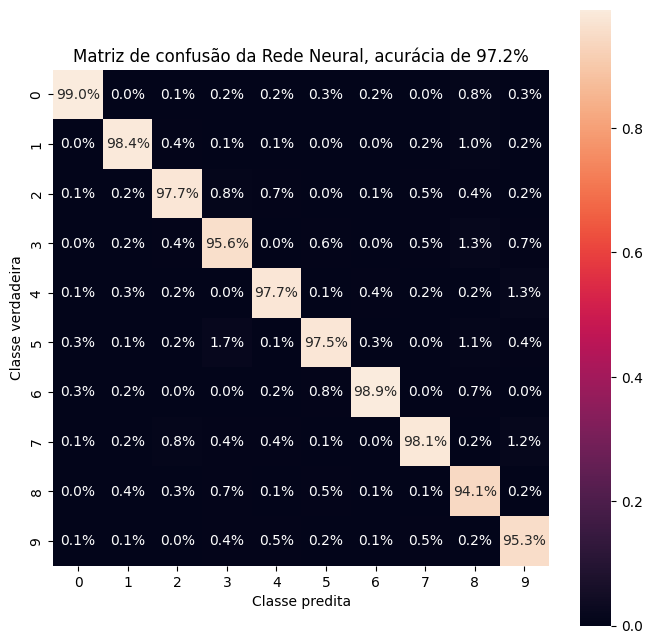

In [5]:
set_random_seed(42)
baseline.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

from sklearn.metrics import confusion_matrix
from seaborn import heatmap

y_pred = baseline.predict(X_val, verbose=False).argmax(axis=1)

plt.figure(figsize=(8,8))
C = confusion_matrix(y_val, y_pred)
heatmap(C/C.sum(axis=0), square=True, annot=True, fmt='.1%')

plt.title(f"Matriz de confusão da Rede Neural, acurácia de {np.diag(C).sum()/C.sum():.1%}")
plt.xlabel('Classe predita')
plt.ylabel('Classe verdadeira')
plt.xticks(np.linspace(0.5, 9.5, 10), range(10))
plt.yticks(np.linspace(0.5, 9.5, 10), range(10))
plt.show()

(0.5 points) PCA model: Redo the experiment with the inclusion of PCA. Plot the accuracy (or other classification metric) against ```n_components``` and analyze the model.

In [6]:
class PCA:
    def fit(self, X):
        self.n_samples, self.n_features = X.shape

        self.mean_ = X.mean(axis=0)
        X -= self.mean_

        _, S, Vt = np.linalg.svd(1/(self.n_samples - 1) * (X.T @ X), hermitian=True)

        self.components_ = Vt
        self.variance = S
        self.comulative_variance = np.cumsum(S)/S.sum()
      
        return self
    
    def transform(self, X, n = None):
        if n is None: n = self.n_features

        return (X - self.mean_) @ self.components_[:n].T

    def fit_transform(self, X, n=None):
        self.n_samples, self.n_features = X.shape

        self.mean_ = X.mean(axis=0)
        X -= self.mean_

        _, S, Vt = np.linalg.svd(1/(self.n_samples - 1) * (X.T @ X), hermitian=True)

        self.components_ = Vt
        self.variance = S
        self.comulative_variance = np.cumsum(S)/S.sum()

        if n is None: n = self.n_features

        return X @ self.components_[:n].T


class PCALayer(tf.keras.layers.Layer):
    def __init__(self, n_components, pca):
        super(PCALayer, self).__init__()
        self.total = tf.Variable(initial_value=tf.zeros((n_components,)), trainable=False)
        self.n_components = n_components
        self.pca = pca

    def call(self, inputs):
        output = pca.transform(inputs, self.n_components)

        return output

In [7]:
from tqdm import tqdm

set_random_seed(42)
pca = PCA()
pca.fit(X_train)

NCOMPONENTS = range(10, 784, 10)

accuracy = []
n_params = []

for n_components in tqdm(NCOMPONENTS):
    pca_nn = tf.keras.models.Sequential([
         tf.keras.layers.Input((784,)),
         PCALayer(n_components, pca),
         tf.keras.layers.Dense(128, activation='relu'),
         tf.keras.layers.Dense(10, activation='softmax')
    ],  name = "pca_network")
    pca_nn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    pca_nn.fit(X_train, y_train, epochs=1, verbose=False)

    accuracy.append(pca_nn.evaluate(X_val, y_val, verbose=False)[-1])
    n_params.append(pca_nn.count_params())

    tf.keras.backend.clear_session()

accuracy = np.array(accuracy)
n_params = np.array(n_params)

100%|██████████| 78/78 [03:21<00:00,  2.58s/it]


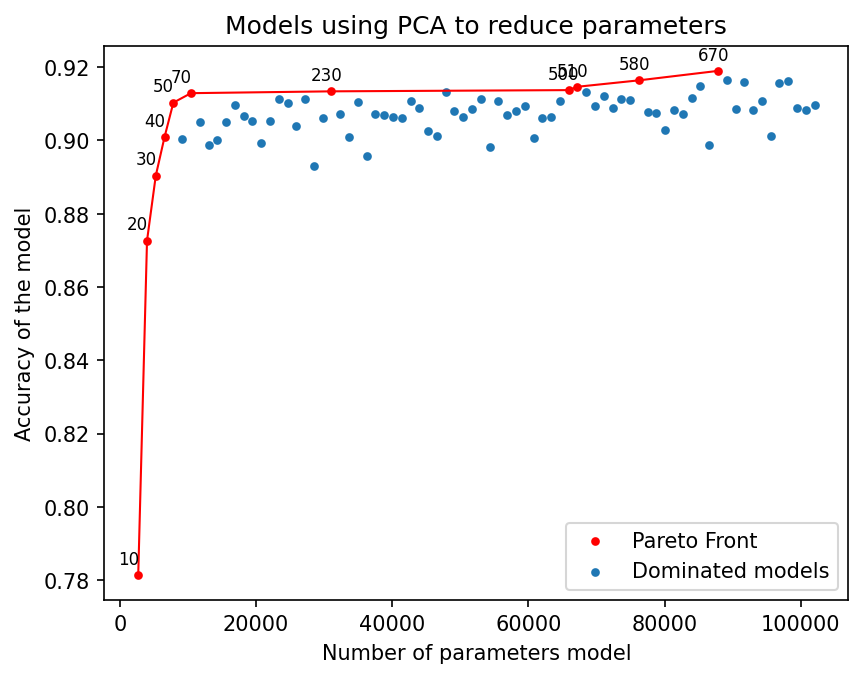

In [8]:
pareto_front = []
best = 0

for i in range(len(n_params)):
    if accuracy[i] > best:
        pareto_front.append(i)
        best = accuracy[i]

fig, ax = plt.subplots(dpi=150)
ax.plot(n_params[pareto_front], accuracy[pareto_front], c='red', linewidth=1)
ax.scatter(n_params[pareto_front], accuracy[pareto_front], s=10, c='red', label="Pareto Front")
ax.scatter(np.delete(n_params, pareto_front), np.delete(accuracy, pareto_front), s=10, label="Dominated models")

for model in pareto_front:
    ax.text(n_params[model] - 3000, accuracy[model] + 0.003, NCOMPONENTS[model], fontsize=8)

ax.set_title('Models using PCA to reduce parameters')
ax.set_xlabel('Number of parameters model')
ax.set_ylabel('Accuracy of the model')
ax.legend()

plt.show()

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.9011
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1510 - accuracy: 0.9566
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0955 - accuracy: 0.9733
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0632 - accuracy: 0.9834
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0423 - accuracy: 0.9890


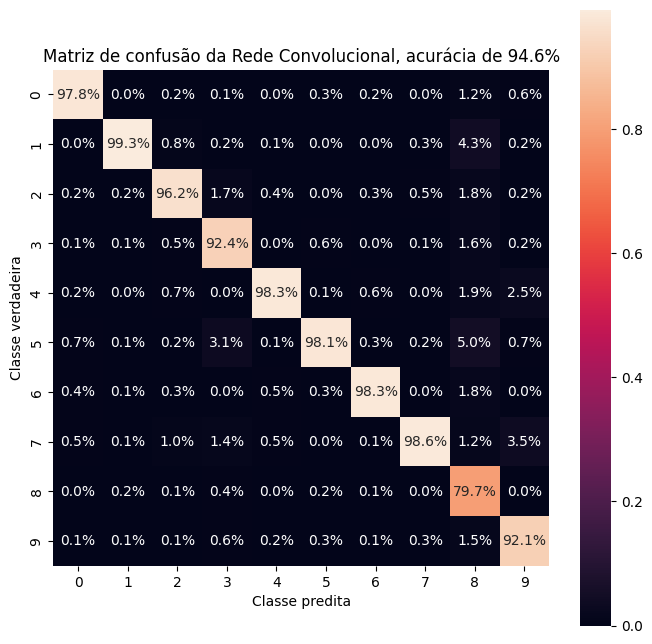

In [12]:
best_comp = NCOMPONENTS[pareto_front[-2]]

set_random_seed(42)
pca_nn = tf.keras.models.Sequential([
        tf.keras.layers.Input((784,)),
        PCALayer(best_comp, pca),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
],  name = "pca_network")
pca_nn.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
pca_nn.fit(X_train, y_train, epochs=5)

y_pred = pca_nn.predict(X_val, verbose=False).argmax(axis=1)

plt.figure(figsize=(8,8))
C = confusion_matrix(y_val, y_pred)
heatmap(C/C.sum(axis=0), square=True, annot=True, fmt='.1%')

plt.title(f"Matriz de confusão da Rede Convolucional, acurácia de {np.diag(C).sum()/C.sum():.1%}")
plt.xlabel('Classe predita')
plt.ylabel('Classe verdadeira')
plt.xticks(np.linspace(0.5, 9.5, 10), range(10))
plt.yticks(np.linspace(0.5, 9.5, 10), range(10))
plt.show()

(0.25 points) Evaluate both the baseline model and the PCA model using the test set. Display the confusion matrices for both cases.

In [13]:
if not os.path.exists('digit_recognizer_test.csv'):
    !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=11uD9mh9Ebvdb8b714BbAzNOgcd92oJPb' -O digit_recognizer_test.csv

df = pd.read_csv('digit_recognizer_test.csv')
df = df.sample(frac=1)

y_test = df['label'].to_numpy()
X_test = df.drop(columns=['label']).to_numpy() / 255

df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
6252,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4684,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1731,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4742,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4521,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


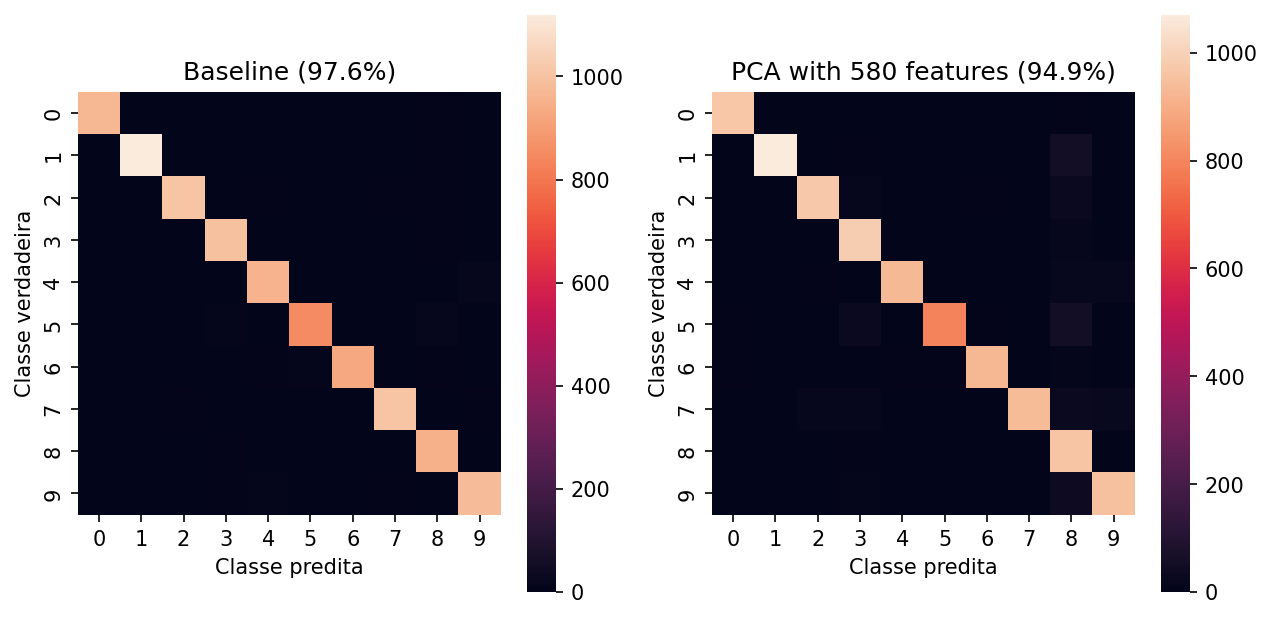

In [14]:
fig, axs = plt.subplots(ncols=2, dpi=150, figsize=(10,5))

y_pred = baseline.predict(X_test, verbose=False).argmax(axis=1)

C = confusion_matrix(y_test, y_pred)
heatmap(C, square=True, ax=axs[0])

axs[0].set_title(f"Baseline ({np.diag(C).sum()/C.sum():.1%})")
axs[0].set_xlabel('Classe predita')
axs[0].set_ylabel('Classe verdadeira')
axs[0].set_xticks(np.linspace(0.5, 9.5, 10), range(10))
axs[0].set_yticks(np.linspace(0.5, 9.5, 10), range(10))

y_pred = pca_nn.predict(X_test, verbose=False).argmax(axis=1)

C = confusion_matrix(y_test, y_pred)
heatmap(C, square=True, ax=axs[1])

axs[1].set_title(f"PCA with {best_comp} features ({np.diag(C).sum()/C.sum():.1%})")
axs[1].set_xlabel('Classe predita')
axs[1].set_ylabel('Classe verdadeira')
axs[1].set_xticks(np.linspace(0.5, 9.5, 10), range(10))
axs[1].set_yticks(np.linspace(0.5, 9.5, 10), range(10))
plt.show()

**(2 points) Questions:**

- Which model was used? What was the best result achieved without using PCA?
- What are your conclusions about the Baseline model?
- How did you define the best model for both approaches?
- Did the accuracy improve when using the PCA model?
- What are the advantages and disadvantages of using PCA on this dataset?


## Deadline

Wednesday, May 22, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May 23, 11:59 pm : grade * 0.75
- May 24, 11:59 pm : grade * 0.5
- May 25, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**